## Import 
#### 1. Import Package

In [1]:
# Import package
import pandas as pd
import numpy as np
import bitermplus as btm
import gensim
import tmplot as tmp
import matplotlib.pyplot as plt
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.evaluation_metrics.diversity_metrics import TopicDiversity

#### 2. Import Data

In [48]:
df = pd.read_csv ('../../../Data/Year_and_Text/USCA.csv')
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
# convert
clean_data = list(sent_to_words(df["clean_text"]))
listOfText = []
CORPUS = []
for i in range(len(clean_data)):
    listOfText.append(" ".join(clean_data[i]))
for i in range(len(clean_data)):
    CORPUS.append(clean_data[i])

<ipython-input-48-dbfb7307245f>:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('../Data/USCA.csv')


## Topic modeling with Biterm
---

#### 1. Text Peparation

In [4]:
texts = listOfText

# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()

# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))

# Generating biterms
biterms = btm.get_biterms(docs_vec)

#### 2. Optimal Number of Topics

In [123]:
## Metrics Function
def evaluation(N_topics, X, vocabulary, CORPUS, TOPK, Detail = True, cohe_type = "c_npmi"):
    model = btm.BTM(X, vocabulary, T=N_topics, M=TOPK, alpha=1, beta=0.01)
    model.fit(biterms, iterations=100)
    # output_tm
    topic_list = btm.get_top_topic_words(model)
    biterm_topics = []
    for i in topic_list.columns:
        biterm_topics.append(list(topic_list[i][:TOPK]))
    output_tm = {"topics": biterm_topics}
    output_tm
    """Prepare evaluation measures using OCTIS"""
    
    # Metrics
    cohe_score = Coherence(texts=CORPUS, topk=TOPK, measure= cohe_type)
    topic_diversity = TopicDiversity(topk= TOPK)

    # Define methods
    coherence = [(cohe_score, "coherance")]
    diversity = [(topic_diversity, "diversity")]
    metrics = [(coherence, "Coherence"), (diversity, "Diversity")]

    ## Output Metrics
    results = {}
    for scorers, _ in metrics:
        for scorer, name in scorers:
            score = scorer.score(output_tm)
            results[name] = float(score)
    
    # Print results
    if Detail:
        print("Results")
        print("===============")
        print("Topic number: "+str(N_topics))
        for metric, score in results.items():
            print(f"{metric}: {str(score)}")
        print(" ")
    return results

#### 3. Run to see the result
topic number between 20 to 50

In [66]:
# 20 to 50
npmi = []
diversity = []

NPMI = []
DIVERSITY = []

for n in range(20,50,2):
    for i in range(3):
        result = evaluation(N_topics = n, X = X, vocabulary = vocabulary, CORPUS = CORPUS, TOPK = 10, Detail = True, cohe_type = "c_npmi")
        npmi.append(result["coherance"])
        diversity.append(result["diversity"])
    NPMI.append(np.mean(npmi))
    DIVERSITY.append(np.mean(diversity))
    npmi = []
    diversity = []

print(NPMI)
print(DIVERSITY)

100%|██████████| 100/100 [09:18<00:00,  5.59s/it]


Results
Topic number: 20
npmi: 0.12357692629520764
diversity: 0.625
 


100%|██████████| 100/100 [09:22<00:00,  5.63s/it]


Results
Topic number: 20
npmi: 0.12431095117902477
diversity: 0.63
 


100%|██████████| 100/100 [09:15<00:00,  5.55s/it]


Results
Topic number: 20
npmi: 0.11302194336651232
diversity: 0.59
 


100%|██████████| 100/100 [09:28<00:00,  5.69s/it]


Results
Topic number: 22
npmi: 0.11623426884811684
diversity: 0.5909090909090909
 


100%|██████████| 100/100 [12:07<00:00,  7.27s/it]


Results
Topic number: 22
npmi: 0.11492814175448479
diversity: 0.5727272727272728
 


100%|██████████| 100/100 [09:30<00:00,  5.71s/it]


Results
Topic number: 22
npmi: 0.1204750934339086
diversity: 0.6227272727272727
 


100%|██████████| 100/100 [10:13<00:00,  6.14s/it]


Results
Topic number: 24
npmi: 0.1229600075508316
diversity: 0.6208333333333333
 


100%|██████████| 100/100 [10:04<00:00,  6.05s/it]


Results
Topic number: 24
npmi: 0.12110340431382764
diversity: 0.5708333333333333
 


100%|██████████| 100/100 [10:08<00:00,  6.09s/it]


Results
Topic number: 24
npmi: 0.116629144500167
diversity: 0.5958333333333333
 


100%|██████████| 100/100 [11:03<00:00,  6.63s/it]


Results
Topic number: 26
npmi: 0.11821656574653816
diversity: 0.5884615384615385
 


100%|██████████| 100/100 [13:00<00:00,  7.80s/it]


Results
Topic number: 26
npmi: 0.12139080310945821
diversity: 0.6
 


100%|██████████| 100/100 [10:53<00:00,  6.54s/it]


Results
Topic number: 26
npmi: 0.10728438983969342
diversity: 0.5653846153846154
 


100%|██████████| 100/100 [11:41<00:00,  7.01s/it]


Results
Topic number: 28
npmi: 0.11808254283711482
diversity: 0.5714285714285714
 


100%|██████████| 100/100 [11:38<00:00,  6.98s/it]


Results
Topic number: 28
npmi: 0.12099909245103554
diversity: 0.6035714285714285
 


100%|██████████| 100/100 [14:32<00:00,  8.73s/it]


Results
Topic number: 28
npmi: 0.1211523915010299
diversity: 0.575
 


100%|██████████| 100/100 [12:48<00:00,  7.68s/it]


Results
Topic number: 30
npmi: 0.11967416768230142
diversity: 0.56
 


100%|██████████| 100/100 [12:29<00:00,  7.50s/it]


Results
Topic number: 30
npmi: 0.1200331455017903
diversity: 0.56
 


100%|██████████| 100/100 [12:51<00:00,  7.71s/it]


Results
Topic number: 30
npmi: 0.11691790563701968
diversity: 0.5566666666666666
 


100%|██████████| 100/100 [13:36<00:00,  8.17s/it]


Results
Topic number: 32
npmi: 0.12351723646827008
diversity: 0.575
 


100%|██████████| 100/100 [16:36<00:00,  9.96s/it]


Results
Topic number: 32
npmi: 0.1316239774801139
diversity: 0.575
 


100%|██████████| 100/100 [13:30<00:00,  8.10s/it]


Results
Topic number: 32
npmi: 0.11953635571488648
diversity: 0.5375
 


100%|██████████| 100/100 [14:10<00:00,  8.50s/it]


Results
Topic number: 34
npmi: 0.12464341160139358
diversity: 0.55
 


100%|██████████| 100/100 [14:09<00:00,  8.50s/it]


Results
Topic number: 34
npmi: 0.12609181847992207
diversity: 0.5441176470588235
 


100%|██████████| 100/100 [16:04<00:00,  9.65s/it]


Results
Topic number: 34
npmi: 0.12327410556889745
diversity: 0.5558823529411765
 


100%|██████████| 100/100 [11:32<00:00,  6.92s/it]


Results
Topic number: 36
npmi: 0.11475535626225196
diversity: 0.5277777777777778
 


100%|██████████| 100/100 [11:39<00:00,  7.00s/it]


Results
Topic number: 36
npmi: 0.12628182942324592
diversity: 0.5444444444444444
 


100%|██████████| 100/100 [11:25<00:00,  6.85s/it]


Results
Topic number: 36
npmi: 0.12610642097180777
diversity: 0.5361111111111111
 


100%|██████████| 100/100 [15:00<00:00,  9.01s/it]


Results
Topic number: 38
npmi: 0.1275912863154432
diversity: 0.5052631578947369
 


100%|██████████| 100/100 [11:58<00:00,  7.18s/it]


Results
Topic number: 38
npmi: 0.12182351475310471
diversity: 0.5263157894736842
 


100%|██████████| 100/100 [12:04<00:00,  7.25s/it]


Results
Topic number: 38
npmi: 0.12569931737946363
diversity: 0.55
 


100%|██████████| 100/100 [12:38<00:00,  7.59s/it]


Results
Topic number: 40
npmi: 0.11842889790437158
diversity: 0.5225
 


100%|██████████| 100/100 [15:21<00:00,  9.22s/it]


Results
Topic number: 40
npmi: 0.12337028901015254
diversity: 0.5375
 


100%|██████████| 100/100 [12:30<00:00,  7.51s/it]


Results
Topic number: 40
npmi: 0.12622390734149982
diversity: 0.53
 


100%|██████████| 100/100 [13:05<00:00,  7.85s/it]


Results
Topic number: 42
npmi: 0.12204633643285227
diversity: 0.5166666666666667
 


100%|██████████| 100/100 [16:02<00:00,  9.62s/it]


Results
Topic number: 42
npmi: 0.1178136022490299
diversity: 0.5119047619047619
 


100%|██████████| 100/100 [13:05<00:00,  7.86s/it]


Results
Topic number: 42
npmi: 0.11665735914424172
diversity: 0.49523809523809526
 


100%|██████████| 100/100 [13:42<00:00,  8.22s/it]


Results
Topic number: 44
npmi: 0.12401023083970118
diversity: 0.5159090909090909
 


100%|██████████| 100/100 [13:42<00:00,  8.22s/it]


Results
Topic number: 44
npmi: 0.12339277439328936
diversity: 0.5068181818181818
 


100%|██████████| 100/100 [16:34<00:00,  9.94s/it]


Results
Topic number: 44
npmi: 0.1279663762810986
diversity: 0.5295454545454545
 


100%|██████████| 100/100 [14:24<00:00,  8.64s/it]


Results
Topic number: 46
npmi: 0.1309230471475431
diversity: 0.5043478260869565
 


100%|██████████| 100/100 [14:17<00:00,  8.58s/it]


Results
Topic number: 46
npmi: 0.12238802497364439
diversity: 0.48695652173913045
 


100%|██████████| 100/100 [17:09<00:00, 10.30s/it]


Results
Topic number: 46
npmi: 0.12348841154854813
diversity: 0.4956521739130435
 


100%|██████████| 100/100 [14:56<00:00,  8.97s/it]


Results
Topic number: 48
npmi: 0.12363816525776576
diversity: 0.5083333333333333
 


100%|██████████| 100/100 [14:59<00:00,  9.00s/it]


Results
Topic number: 48
npmi: 0.12727139256484424
diversity: 0.5020833333333333
 


100%|██████████| 100/100 [17:48<00:00, 10.69s/it]


Results
Topic number: 48
npmi: 0.13070018929433022
diversity: 0.5
 
[0.12030327361358158, 0.11721250134550341, 0.12023085212160874, 0.11563058623189659, 0.12007800892972675, 0.11887507294037047, 0.12489252322109014, 0.12466977855007104, 0.12238120221910187, 0.12503803948267053, 0.12267436475200799, 0.11883909927537462, 0.12512312717136306, 0.12559982788991186, 0.12720324903898006]
[0.6149999999999999, 0.5954545454545453, 0.5958333333333333, 0.5846153846153846, 0.5833333333333333, 0.5588888888888889, 0.5625, 0.55, 0.5361111111111111, 0.5271929824561404, 0.53, 0.5079365079365079, 0.5174242424242425, 0.4956521739130435, 0.5034722222222222]


topic number between 50 to 80

In [70]:
# 50 to 80
npmi = []
diversity = []

NPMI_2 = []
DIVERSITY_2 = []

for n in range(50,80,2):
    for i in range(3):
        result = evaluation(N_topics = n, X = X, vocabulary = vocabulary, CORPUS = CORPUS, 
                            TOPK = 10, Detail = True, cohe_type = "c_npmi")
        npmi.append(result["npmi"])
        diversity.append(result["diversity"])
    NPMI_2.append(np.mean(npmi))
    DIVERSITY_2.append(np.mean(diversity))
    npmi = []
    diversity = []

print(NPMI_2)
print(DIVERSITY_2)

100%|██████████| 100/100 [17:23<00:00, 10.43s/it]


Results
Topic number: 50
npmi: 0.1297861892556088
diversity: 0.502
 


100%|██████████| 100/100 [19:36<00:00, 11.76s/it]


Results
Topic number: 50
npmi: 0.12206319101740616
diversity: 0.496
 


100%|██████████| 100/100 [21:39<00:00, 12.99s/it]


Results
Topic number: 50
npmi: 0.12096245260538692
diversity: 0.484
 


100%|██████████| 100/100 [18:53<00:00, 11.33s/it]


Results
Topic number: 52
npmi: 0.12793425268195038
diversity: 0.4653846153846154
 


100%|██████████| 100/100 [17:40<00:00, 10.61s/it]


Results
Topic number: 52
npmi: 0.1206600142189794
diversity: 0.47692307692307695
 


100%|██████████| 100/100 [16:02<00:00,  9.62s/it]


Results
Topic number: 52
npmi: 0.12288551295582817
diversity: 0.49615384615384617
 


100%|██████████| 100/100 [16:27<00:00,  9.87s/it]


Results
Topic number: 54
npmi: 0.1206692523997409
diversity: 0.48333333333333334
 


100%|██████████| 100/100 [19:09<00:00, 11.49s/it]


Results
Topic number: 54
npmi: 0.11984541945293864
diversity: 0.4777777777777778
 


100%|██████████| 100/100 [16:30<00:00,  9.91s/it]


Results
Topic number: 54
npmi: 0.12053430723141627
diversity: 0.47962962962962963
 


100%|██████████| 100/100 [17:01<00:00, 10.21s/it]


Results
Topic number: 56
npmi: 0.12146274117360467
diversity: 0.4767857142857143
 


100%|██████████| 100/100 [20:53<00:00, 12.53s/it]


Results
Topic number: 56
npmi: 0.11861995882318539
diversity: 0.4589285714285714
 


100%|██████████| 100/100 [20:12<00:00, 12.13s/it]


Results
Topic number: 56
npmi: 0.12397716588305994
diversity: 0.475
 


100%|██████████| 100/100 [20:56<00:00, 12.57s/it]


Results
Topic number: 58
npmi: 0.13108049008355335
diversity: 0.4862068965517241
 


100%|██████████| 100/100 [24:33<00:00, 14.73s/it]


Results
Topic number: 58
npmi: 0.12884038312267151
diversity: 0.4724137931034483
 


100%|██████████| 100/100 [20:03<00:00, 12.04s/it]


Results
Topic number: 58
npmi: 0.11768035794066047
diversity: 0.4706896551724138
 


100%|██████████| 100/100 [22:50<00:00, 13.71s/it]


Results
Topic number: 60
npmi: 0.1224800322815571
diversity: 0.4716666666666667
 


100%|██████████| 100/100 [19:46<00:00, 11.87s/it]


Results
Topic number: 60
npmi: 0.12600091228892196
diversity: 0.48
 


100%|██████████| 100/100 [50:39<00:00, 30.40s/it]  


Results
Topic number: 60
npmi: 0.1171023816880941
diversity: 0.4683333333333333
 


100%|██████████| 100/100 [22:51<00:00, 13.71s/it]


Results
Topic number: 62
npmi: 0.12311676853387772
diversity: 0.4629032258064516
 


100%|██████████| 100/100 [22:45<00:00, 13.66s/it]


Results
Topic number: 62
npmi: 0.12548502600407804
diversity: 0.45483870967741935
 


100%|██████████| 100/100 [25:36<00:00, 15.36s/it]


Results
Topic number: 62
npmi: 0.11636474986190282
diversity: 0.4435483870967742
 


100%|██████████| 100/100 [22:50<00:00, 13.71s/it]


Results
Topic number: 64
npmi: 0.12683948092607142
diversity: 0.4609375
 


100%|██████████| 100/100 [25:52<00:00, 15.52s/it]


Results
Topic number: 64
npmi: 0.12545565843690984
diversity: 0.44375
 


100%|██████████| 100/100 [22:52<00:00, 13.73s/it]


Results
Topic number: 64
npmi: 0.12706955072550036
diversity: 0.4640625
 


100%|██████████| 100/100 [23:22<00:00, 14.02s/it]


Results
Topic number: 66
npmi: 0.12202233474265539
diversity: 0.44696969696969696
 


100%|██████████| 100/100 [22:58<00:00, 13.79s/it]


Results
Topic number: 66
npmi: 0.12621162608092956
diversity: 0.46060606060606063
 


100%|██████████| 100/100 [22:49<00:00, 13.69s/it]


Results
Topic number: 66
npmi: 0.12814726618943093
diversity: 0.46515151515151515
 


100%|██████████| 100/100 [23:57<00:00, 14.38s/it]


Results
Topic number: 68
npmi: 0.12332613104739197
diversity: 0.43970588235294117
 


100%|██████████| 100/100 [21:19<00:00, 12.79s/it]


Results
Topic number: 68
npmi: 0.10966813281881932
diversity: 0.43676470588235294
 


100%|██████████| 100/100 [23:42<00:00, 14.22s/it]


Results
Topic number: 68
npmi: 0.12304274475056767
diversity: 0.45441176470588235
 


100%|██████████| 100/100 [21:50<00:00, 13.10s/it]


Results
Topic number: 70
npmi: 0.11497680490552824
diversity: 0.43857142857142856
 


100%|██████████| 100/100 [24:29<00:00, 14.70s/it]


Results
Topic number: 70
npmi: 0.12003583290442822
diversity: 0.44
 


100%|██████████| 100/100 [22:02<00:00, 13.23s/it]


Results
Topic number: 70
npmi: 0.123758634234038
diversity: 0.43142857142857144
 


100%|██████████| 100/100 [25:21<00:00, 15.21s/it]


Results
Topic number: 72
npmi: 0.12199564724417626
diversity: 0.44027777777777777
 


100%|██████████| 100/100 [29:09<00:00, 17.49s/it]


Results
Topic number: 72
npmi: 0.11642791672445342
diversity: 0.42083333333333334
 


100%|██████████| 100/100 [24:47<00:00, 14.88s/it]


Results
Topic number: 72
npmi: 0.1223066650807263
diversity: 0.4361111111111111
 


100%|██████████| 100/100 [27:53<00:00, 16.73s/it]


Results
Topic number: 74
npmi: 0.11889675872062293
diversity: 0.43648648648648647
 


100%|██████████| 100/100 [23:34<00:00, 14.14s/it]


Results
Topic number: 74
npmi: 0.12507814600898076
diversity: 0.43513513513513513
 


100%|██████████| 100/100 [27:16<00:00, 16.36s/it]


Results
Topic number: 74
npmi: 0.12390370200709702
diversity: 0.42702702702702705
 


100%|██████████| 100/100 [26:30<00:00, 15.91s/it]


Results
Topic number: 76
npmi: 0.12094425951459166
diversity: 0.43026315789473685
 


100%|██████████| 100/100 [32:02<00:00, 19.23s/it]


Results
Topic number: 76
npmi: 0.12205434088577641
diversity: 0.4355263157894737
 


100%|██████████| 100/100 [35:00<00:00, 21.01s/it]


Results
Topic number: 76
npmi: 0.1212053993475356
diversity: 0.4328947368421053
 


100%|██████████| 100/100 [36:51<00:00, 22.12s/it]


Results
Topic number: 78
npmi: 0.12140514585482187
diversity: 0.41923076923076924
 


100%|██████████| 100/100 [31:41<00:00, 19.02s/it]


Results
Topic number: 78
npmi: 0.1254033292707508
diversity: 0.4217948717948718
 


100%|██████████| 100/100 [48:31<00:00, 29.12s/it] 


Results
Topic number: 78
npmi: 0.12161364959342588
diversity: 0.4307692307692308
 
[0.12427061095946729, 0.12382659328558598, 0.12034965969469862, 0.12135328862661666, 0.12586707704896177, 0.12186110875285772, 0.12165551479995286, 0.12645489669616053, 0.12546040900433864, 0.11867900287225967, 0.11959042401466481, 0.12024340968311865, 0.1226262022455669, 0.12140133324930123, 0.12280737490633285]
[0.494, 0.4794871794871795, 0.4802469135802469, 0.4702380952380952, 0.4764367816091954, 0.47333333333333333, 0.4537634408602151, 0.45625, 0.4575757575757576, 0.44362745098039214, 0.4366666666666667, 0.4324074074074074, 0.43288288288288285, 0.4328947368421053, 0.4239316239316239]


Combine two list

In [93]:
N = NPMI
for i in NPMI_2:
    N.append(i)


#### Plot (npmi)
Find the optimized number of topics: **48**

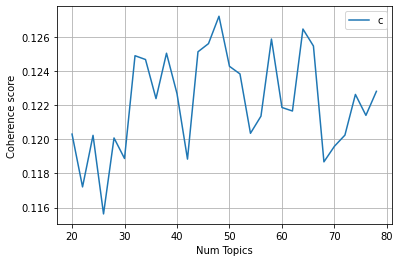

In [128]:
x = range(20,80,2)
c = N
# Show graph
plt.plot(x, c)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [130]:
num = 20
for i in c:
    print("Number: "+str(num))
    print("npmi: "+str(i))
    if i == max(c):
        print("This is the best!!!!!!!!!!!!!!!")
        best = (num,i)
    num+=2
best

Number: 20
npmi: 0.12030327361358158
Number: 22
npmi: 0.11721250134550341
Number: 24
npmi: 0.12023085212160874
Number: 26
npmi: 0.11563058623189659
Number: 28
npmi: 0.12007800892972675
Number: 30
npmi: 0.11887507294037047
Number: 32
npmi: 0.12489252322109014
Number: 34
npmi: 0.12466977855007104
Number: 36
npmi: 0.12238120221910187
Number: 38
npmi: 0.12503803948267053
Number: 40
npmi: 0.12267436475200799
Number: 42
npmi: 0.11883909927537462
Number: 44
npmi: 0.12512312717136306
Number: 46
npmi: 0.12559982788991186
Number: 48
npmi: 0.12720324903898006
This is the best!!!!!!!!!!!!!!!
Number: 50
npmi: 0.12427061095946729
Number: 52
npmi: 0.12382659328558598
Number: 54
npmi: 0.12034965969469862
Number: 56
npmi: 0.12135328862661666
Number: 58
npmi: 0.12586707704896177
Number: 60
npmi: 0.12186110875285772
Number: 62
npmi: 0.12165551479995286
Number: 64
npmi: 0.12645489669616053
Number: 66
npmi: 0.12546040900433864
Number: 68
npmi: 0.11867900287225967
Number: 70
npmi: 0.11959042401466481
Number

(48, 0.12720324903898006)

#### Cross Validation Coherence score

In [124]:
# 40 to 60
c_v = []
diversity = []

C_V = []
DIVERSITY = []

for n in range(40,60,2):
    for i in range(3):
        result = evaluation(N_topics = n, X = X, vocabulary = vocabulary, CORPUS = CORPUS, TOPK = 10, Detail = True, cohe_type = "c_v")
        c_v.append(result["coherance"])
        diversity.append(result["diversity"])
    C_V.append(np.mean(c_v))
    DIVERSITY.append(np.mean(diversity))
    c_v = []
    diversity = []

print(C_V)
print(DIVERSITY)

100%|██████████| 100/100 [17:57<00:00, 10.78s/it]


Results
Topic number: 40
coherance: 0.6734868738541724
diversity: 0.5375
 


100%|██████████| 100/100 [17:30<00:00, 10.50s/it]


Results
Topic number: 40
coherance: 0.6776576077056196
diversity: 0.535
 


100%|██████████| 100/100 [14:24<00:00,  8.65s/it]


Results
Topic number: 40
coherance: 0.6752412785439448
diversity: 0.5175
 


100%|██████████| 100/100 [15:23<00:00,  9.24s/it]


Results
Topic number: 42
coherance: 0.6659187537970868
diversity: 0.5095238095238095
 


100%|██████████| 100/100 [18:01<00:00, 10.82s/it]


Results
Topic number: 42
coherance: 0.6703354096273786
diversity: 0.5261904761904762
 


100%|██████████| 100/100 [20:45<00:00, 12.46s/it]


Results
Topic number: 42
coherance: 0.6670982863050177
diversity: 0.5047619047619047
 


100%|██████████| 100/100 [19:59<00:00, 12.00s/it]


Results
Topic number: 44
coherance: 0.6741677168200915
diversity: 0.5113636363636364
 


100%|██████████| 100/100 [21:58<00:00, 13.18s/it]


Results
Topic number: 44
coherance: 0.6908142186368412
diversity: 0.5113636363636364
 


100%|██████████| 100/100 [20:50<00:00, 12.51s/it]


Results
Topic number: 44
coherance: 0.6794981772997394
diversity: 0.5068181818181818
 


100%|██████████| 100/100 [17:47<00:00, 10.68s/it]


Results
Topic number: 46
coherance: 0.6710364789224413
diversity: 0.5108695652173914
 


100%|██████████| 100/100 [21:33<00:00, 12.94s/it]


Results
Topic number: 46
coherance: 0.6743895020064179
diversity: 0.5
 


100%|██████████| 100/100 [17:49<00:00, 10.70s/it]


Results
Topic number: 46
coherance: 0.6828258175149589
diversity: 0.508695652173913
 


100%|██████████| 100/100 [18:37<00:00, 11.17s/it]


Results
Topic number: 48
coherance: 0.6840415400388653
diversity: 0.5083333333333333
 


100%|██████████| 100/100 [19:46<00:00, 11.86s/it]


Results
Topic number: 48
coherance: 0.6741157043943069
diversity: 0.5104166666666666
 


100%|██████████| 100/100 [16:55<00:00, 10.16s/it]


Results
Topic number: 48
coherance: 0.6797264401246613
diversity: 0.5125
 


100%|██████████| 100/100 [19:08<00:00, 11.49s/it]


Results
Topic number: 50
coherance: 0.6707062253538782
diversity: 0.476
 


100%|██████████| 100/100 [20:06<00:00, 12.06s/it]


Results
Topic number: 50
coherance: 0.676445755920693
diversity: 0.496
 


100%|██████████| 100/100 [20:06<00:00, 12.06s/it]


Results
Topic number: 50
coherance: 0.6679970212627449
diversity: 0.492
 


100%|██████████| 100/100 [18:02<00:00, 10.82s/it]


Results
Topic number: 52
coherance: 0.671700833339671
diversity: 0.4807692307692308
 


100%|██████████| 100/100 [20:32<00:00, 12.32s/it]


Results
Topic number: 52
coherance: 0.6764756821626854
diversity: 0.4807692307692308
 


100%|██████████| 100/100 [20:49<00:00, 12.49s/it]


Results
Topic number: 52
coherance: 0.6807428067020874
diversity: 0.49615384615384617
 


100%|██████████| 100/100 [18:17<00:00, 10.98s/it]


Results
Topic number: 54
coherance: 0.677041155538507
diversity: 0.4981481481481482
 


100%|██████████| 100/100 [21:13<00:00, 12.74s/it]


Results
Topic number: 54
coherance: 0.6849351420267153
diversity: 0.48703703703703705
 


100%|██████████| 100/100 [21:12<00:00, 12.73s/it]


Results
Topic number: 54
coherance: 0.6806217412413136
diversity: 0.48703703703703705
 


100%|██████████| 100/100 [21:33<00:00, 12.93s/it]


Results
Topic number: 56
coherance: 0.674339993152546
diversity: 0.48214285714285715
 


100%|██████████| 100/100 [18:48<00:00, 11.28s/it]


Results
Topic number: 56
coherance: 0.6708634656713245
diversity: 0.48035714285714287
 


100%|██████████| 100/100 [21:41<00:00, 13.02s/it]


Results
Topic number: 56
coherance: 0.6937607991315315
diversity: 0.4928571428571429
 


100%|██████████| 100/100 [22:12<00:00, 13.33s/it]


Results
Topic number: 58
coherance: 0.6758589430391428
diversity: 0.4706896551724138
 


100%|██████████| 100/100 [19:29<00:00, 11.69s/it]


Results
Topic number: 58
coherance: 0.6815412659516543
diversity: 0.47586206896551725
 


100%|██████████| 100/100 [21:37<00:00, 12.98s/it]


Results
Topic number: 58
coherance: 0.6726583111588871
diversity: 0.46551724137931033
 
[0.6754619200345789, 0.6677841499098277, 0.6814933709188907, 0.6760839328146059, 0.6792945615192778, 0.6717163341791054, 0.6763064407348146, 0.6808660129355119, 0.6796547526518006, 0.6766861733832282]
[0.5299999999999999, 0.5134920634920634, 0.5098484848484849, 0.5065217391304347, 0.5104166666666666, 0.488, 0.48589743589743595, 0.49074074074074076, 0.4851190476190476, 0.4706896551724138]


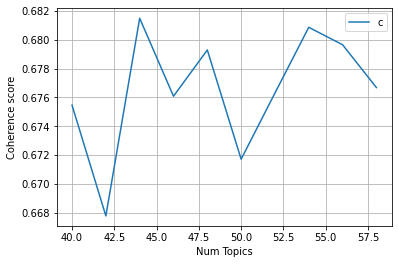

In [131]:
x = range(40,60,2)
c = C_V
# Show graph
plt.plot(x, c)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [132]:
num = 40
for i in c:
    print("Number: "+str(num))
    print("CV: "+str(i))
    if i == max(c):
        print("This is the best!!!!!!!!!!!!!!!")
        best = (num,i)
    num+=2
best

Number: 40
CV: 0.6754619200345789
Number: 42
CV: 0.6677841499098277
Number: 44
CV: 0.6814933709188907
This is the best!!!!!!!!!!!!!!!
Number: 46
CV: 0.6760839328146059
Number: 48
CV: 0.6792945615192778
Number: 50
CV: 0.6717163341791054
Number: 52
CV: 0.6763064407348146
Number: 54
CV: 0.6808660129355119
Number: 56
CV: 0.6796547526518006
Number: 58
CV: 0.6766861733832282


(44, 0.6814933709188907)

#### Optimized Coherence Score

In [121]:
max(N)

0.12720324903898006

#### Optimized Model Visulization

In [133]:
model = btm.BTM(X, vocabulary, T=44, M=10, alpha=1, beta=0.01)
model.fit(biterms, iterations=100)
tmp.report(model=model, docs=texts)

100%|██████████| 100/100 [16:17<00:00,  9.77s/it]
/Users/hanjunwei/Desktop/UL/ul_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hanjunwei/Desktop/UL/ul_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


#### Output topic List

Reorganize topic list

In [134]:
topic_list = btm.get_top_topic_words(model)
biterm_topics = []
for i in topic_list.columns:
    biterm_topics.append(list(topic_list[i][:10]))
biterm_topics

[['fall',
  'decedent',
  'head',
  'floor',
  'home',
  'death',
  'injury',
  'strike',
  'trauma',
  'hospital'],
 ['blade',
  'plastic',
  'piece',
  'metal',
  'break',
  'part',
  'handle',
  'crack',
  'hold',
  'food'],
 ['washer',
  'machine',
  'dryer',
  'water',
  'clothe',
  'wash',
  'clean',
  'washing_machine',
  'mold',
  'load'],
 ['hand',
  'cut',
  'finger',
  'left',
  'leg',
  'injury',
  'side',
  'break',
  'handle',
  'arm'],
 ['sell',
  'company',
  'store',
  'com',
  'label',
  'website',
  'redacted',
  'sale',
  'item',
  'canadian'],
 ['hospital',
  'child',
  'die',
  'injury',
  'boy',
  'fire',
  'fall',
  'injure',
  'transport',
  'home'],
 ['smoke',
  'dishwasher',
  'fire',
  'door',
  'turn',
  'microwave',
  'burn',
  'oven',
  'unplug',
  'run'],
 ['fall',
  'chair',
  'break',
  'leg',
  'back',
  'foot',
  'side',
  'ladder',
  'sit',
  'head'],
 ['eye',
  'hospital',
  'doctor',
  'pain',
  'child',
  'treatment',
  'surgery',
  'emergency_ro

Create Data frame

In [136]:
import openpyxl
Topic_Word_List = pd.DataFrame(columns=['Topic_Number', 'Word_1', 'Word_2','Word_3','Word_4', 
                                              'Word_5', 'Word_6','Word_7','Word_8','Word_9','Word_10'])
for i in range(0,44):
    Topic_Word_List = Topic_Word_List.append({'Topic_Number':i, 
                                              'Word_1':biterm_topics[i][0], 
                                              'Word_2':biterm_topics[i][1],
                                              'Word_3':biterm_topics[i][2],
                                              'Word_4':biterm_topics[i][3], 
                                              'Word_5':biterm_topics[i][4], 
                                              'Word_6':biterm_topics[i][5],
                                              'Word_7':biterm_topics[i][6],
                                              'Word_8':biterm_topics[i][7],
                                              'Word_9':biterm_topics[i][8],
                                              'Word_10':biterm_topics[i][9]}, ignore_index=True)

<ipython-input-136-beebed6184b4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-136-beebed6184b4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-136-beebed6184b4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-136-beebed6184b4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-136-beebed6184b4>:5: FutureWarning: The frame.append method i

Output excel file

In [137]:
Topic_Word_List.to_excel("../Result/Topic_Word_List/Biterm_Topic_Word_List_44topics.xlsx", 
                               header = True, index = False)